## Studi Kasus Employee Churn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
df = pd.read_csv('/content/employee_churn.csv')

Analisis Employee Churn adalah sebuah studi terhadap tingkat 'churn' dari karyawan perusahaan. Employee (karyawan) dibilang 'Churn' ketika karyawan tersebut pindah kerja ke kantor lain (berhenti bekerja di kantor asal). Secara garis besar, perusahaan-perusahaan ingin bisa 'memprediksi' employee mana yang akan 'churn', supaya bisa melakukan antisipasi agar employee tersebut tidak jadi 'churn'. Mengapa? Karena...lebih besar ongkos yang dikeluarkan untuk mencari & merekrut karyawan baru, melatih mereka dari 0 lagi, ketimbang mempertahankan employee yang sudah ada. Oleh sebab itu, perusahaan-perusahaan ingin mempelajari faktor-faktor apa saja yang dapat dilihat untuk mengantisipasi 'churn' dari seorang employee. 


Setiap baris merepresentasi data dari seorang employee. 

Penjelasan setiap kolom:
- `office_distance_from_house`: jarak (dalam meter) kantor ke rumah karyawan
- `bonus_salary_percentage`: persentase bonus gaji yang diterima karyawan dalam 6 bulan terakhir
- `job_satisfaction`: tingkat kepuasan kerja karyawan
- `education_level`: tingkat pendidikan karyawan
- `overtime_hour`: lama waktu lembur rata-rata (dalam jam)
- `company_latitude`: koordinat garis lintang kantor pusat perusahaan
- `company_longitude`: koordinat garis bujur kantor pusat perusahaan
- `gender`: apabila 0, berarti perempuan, apabila 1, berarti laki-laki
- `churn`: apabila 1, berarti Churn (si karyawan pindah), apabila 0, berarti tidak Churn (karyawan tidak pindah)

### Soal:

1. (30 POIN) Lakukan explorasi dan visualisasi data secara bebas dan tulislah (dalam poin-poin) insights yang Anda peroleh. Berikan minimal 7 poin-poin. 
2. (20 POIN) Lakukanlah data preparation yang diperlukan (misal: mengubah kolom kategorikal menjadi kolom numerikal, dst). Tuliskanlah langkah-langkah yang Anda lakukan dalam tahap ini. 
3. (20 POIN) Tentukan False Positive dan False Negative dari kasus ini. Mana yang lebih 'penting' untuk diperhatikan? Mana yang lebih 'penting' untuk kita hindari? False Positive, atau False Negative? 
4. (30 POIN) Buatlah Machine Learning Model untuk mengklasifikasikan apakah employee akan Churn atau tidak. Kolom 'target' adalah kolom 'Churn'. Evaluasi-lah machine learning model Anda, dan tentukanlah metrik-metrik yang tepat untuk mengukur akurasi dari machine learning model tersebut. 

### Petunjuk:

1. Kerjakanlah pekerjaan kalian di bagian "Tempat Mengerjakan" (di bawah)
2. Jawablah keempat soal di atas di bagian "Jawaban". 

## Data Understanding

In [5]:
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1


In [6]:
df.shape

(1033, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   float64
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 72.8+ KB


In [8]:
df.dtypes

office_distance_from_house    float64
bonus_salary_percentage       float64
job_satisfaction              float64
education_level                object
overtime_hour                 float64
company_latitude              float64
company_longitude             float64
gender                          int64
churn                           int64
dtype: object

In [9]:
df.describe()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,overtime_hour,company_latitude,company_longitude,gender,churn
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,10771.866409,52.125208,2.482091,3.080121,41.653243,-87.962635,0.499516,0.299129
std,3810.278239,13.624713,0.877098,0.627240,3.705374,8.250586,0.500242,0.458098
min,583.000000,5.000000,0.000000,1.000000,30.000000,-119.646200,0.000000,0.000000
25%,8202.000000,42.600000,2.000000,2.628310,38.942425,-93.153696,0.000000,0.000000
50%,10530.000000,50.980000,3.000000,3.062020,41.557148,-86.857604,0.000000,0.000000
75%,13185.000000,61.730000,3.000000,3.483906,44.144209,-81.745459,1.000000,1.000000
max,24786.000000,95.700000,5.000000,5.000000,55.140000,-66.385462,1.000000,1.000000


In [10]:
df.describe(include = 'O')

,education_level
count,1033
unique,4
top,bachelor/diploma
freq,551


## Data Preperation

In [11]:
df.isnull().sum()

office_distance_from_house    0
bonus_salary_percentage       0
job_satisfaction              0
education_level               0
overtime_hour                 0
company_latitude              0
company_longitude             0
gender                        0
churn                         0
dtype: int64

In [12]:
df["gender"]= df["gender"].map({0: "Male", 1: "Female"})
df["churn"]= df["churn"].map({0: "No", 1: "Yes"})
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,Male,No
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,Male,No
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,Female,Yes
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,Male,No
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,Female,Yes


In [13]:
#mengubah tipe data kolom gender
df['gender'] = df['gender'].astype('object')

#mengubah tipe data kolom churn
df['churn'] = df['churn'].astype('object')

#mengubah tipe data kolom job_satisfaction
df['job_satisfaction'] = df['job_satisfaction'].astype('object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   object 
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   object 
 8   churn                       1033 non-null   object 
dtypes: float64(5), object(4)
memory usage: 72.8+ KB


In [15]:
df.describe(include ="O")

,job_satisfaction,education_level,gender,churn
count,1033.0,1033,1033,1033
unique,6.0,4,2,2
top,3.0,bachelor/diploma,Male,No
freq,408.0,551,517,724


In [16]:
# Menghapus duplikasi data 
df1 = df.drop_duplicates()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   object 
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   object 
 8   churn                       1033 non-null   object 
dtypes: float64(5), object(4)
memory usage: 80.7+ KB


## EDA

In [18]:
df['churn'].value_counts(normalize=True)

No     0.700871
Yes    0.299129
Name: churn, dtype: float64

In [19]:
#kolom kategorik
categorical_columns = df.select_dtypes(exclude = 'number').drop('churn', axis = 1).columns

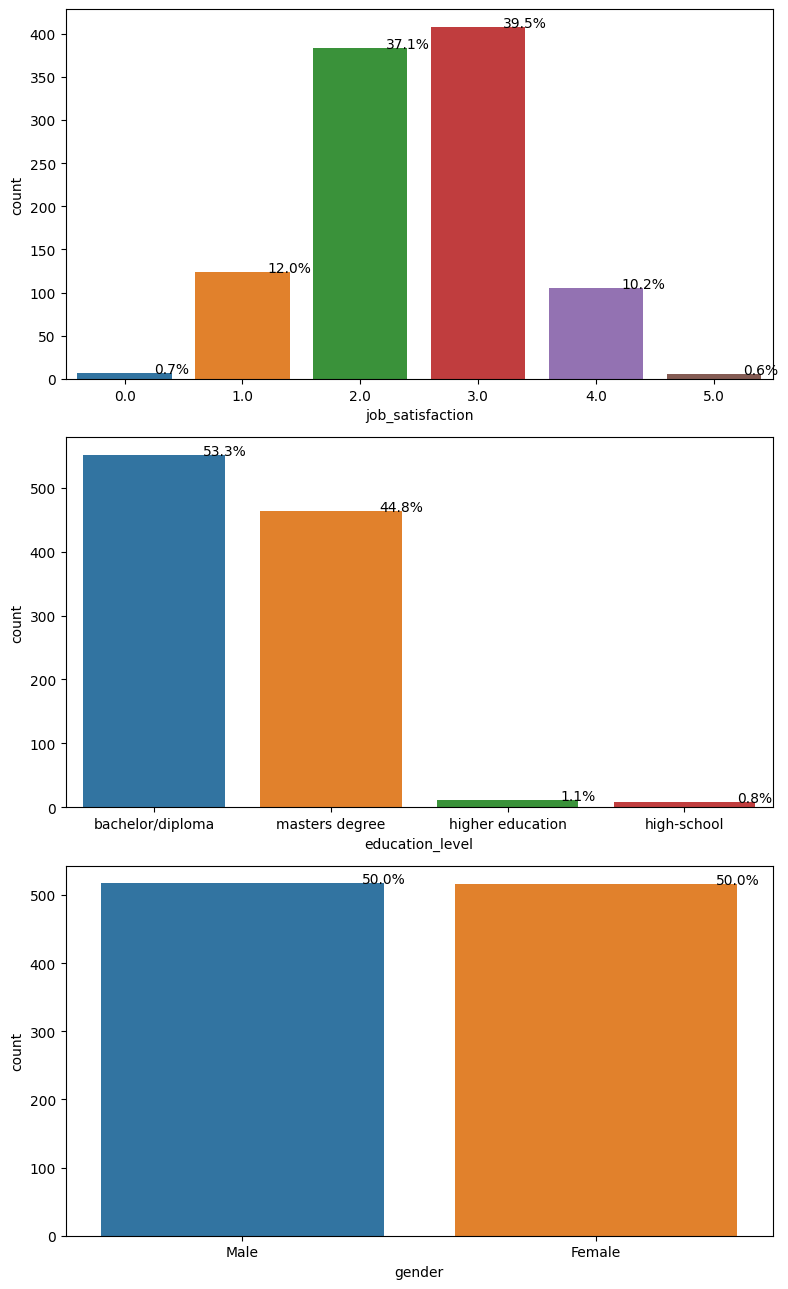

In [26]:
plt.style.use('default')
total = float(len(df))
fig, ax = plt.subplots(3, 1, figsize=(8,13))
ax = ax.flatten()

for i, predictor in enumerate(categorical_columns):
    plt.style.use('default')
    q = sns.countplot(data=df, x=predictor, ax=ax[i])
    for p in q.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        q.annotate(percentage, (x, y),ha='center')
        
plt.tight_layout()
plt.show()

- Berdasarkan grafik diatas, mayoritas karyawan memiliki tingkat kepuasan kerja pada nilai 2.0 dan 3.0, tingkat pendidikan pada jenjang diploma dan sarjana.
- Karyawan laki-laki dan perempuan memiliki presentase yang imbang.


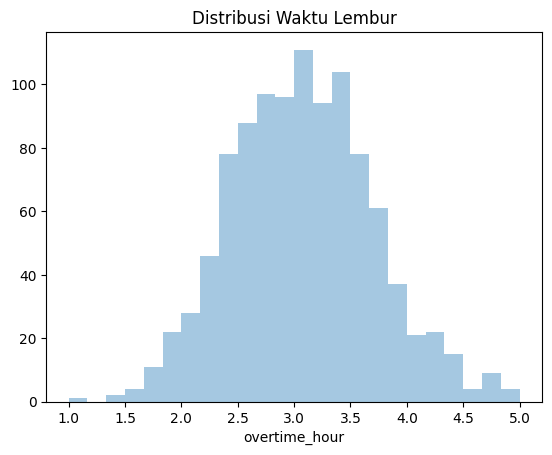

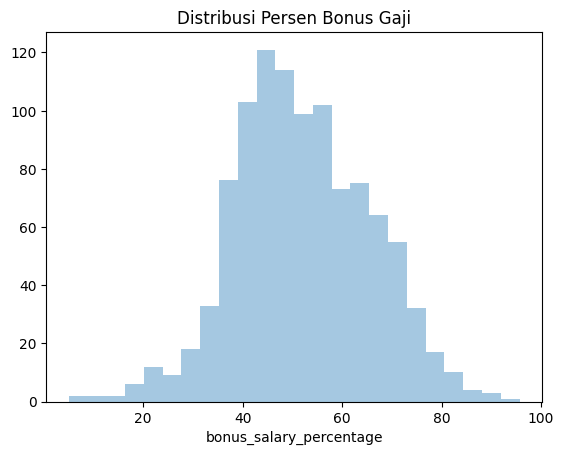

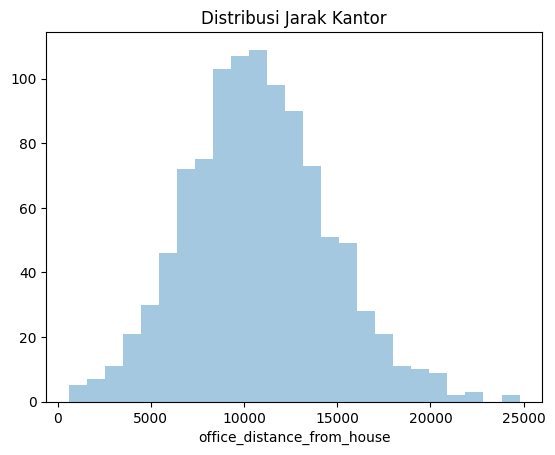

In [ ]:
# Membuat grafik histogram untuk data numerik
fig = sns.distplot(df['overtime_hour'], kde=True,hist=True)
plt.title("Distribusi Waktu Lembur")
plt.show()

fig = sns.distplot(df['bonus_salary_percentage'], kde=True,hist=True)
plt.title("Distribusi Persen Bonus Gaji")
plt.show()

fig = sns.distplot(df['office_distance_from_house'], kde=True,hist=True)
plt.title("Distribusi Jarak Kantor")
plt.show()


## Bivariate Analysis

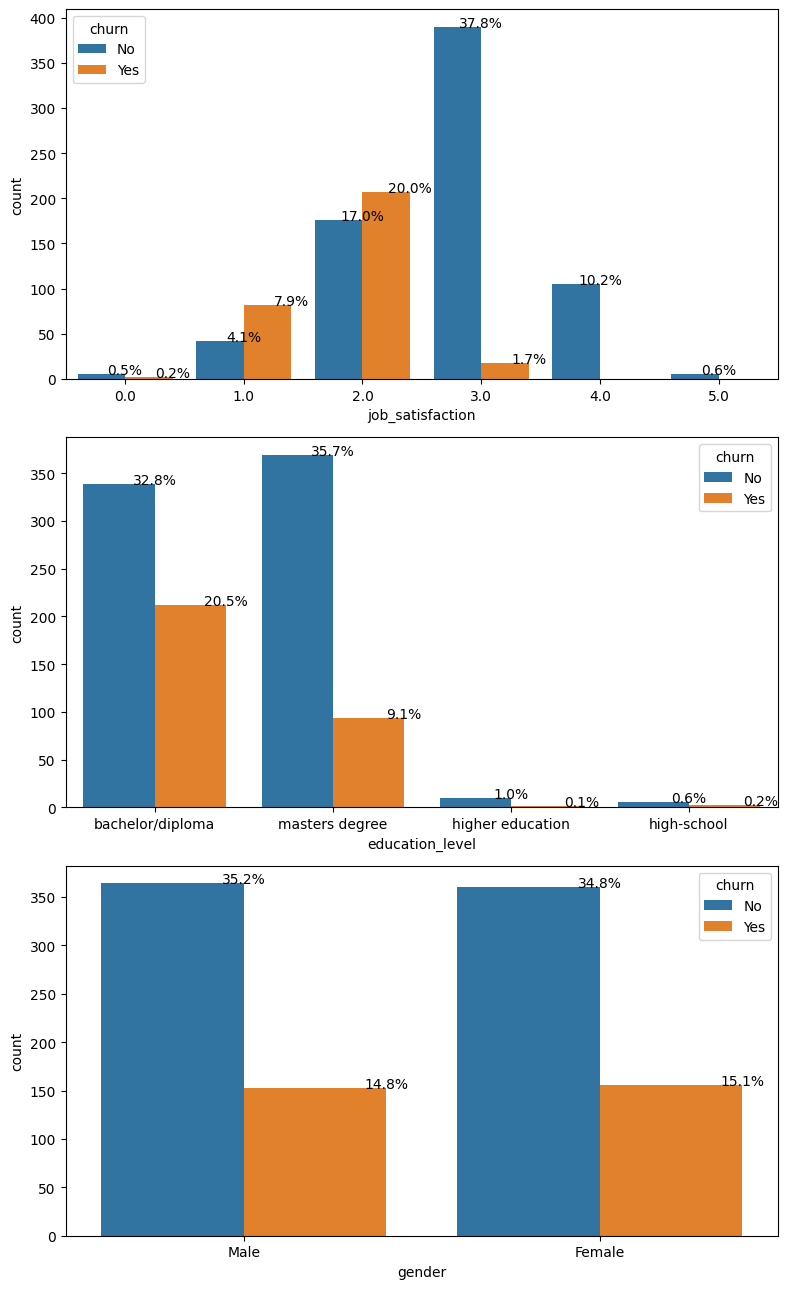

In [27]:
plt.style.use('default')
total = float(len(df))
fig, ax = plt.subplots(3, 1, figsize=(8,13))
ax = ax.flatten()

for i, predictor in enumerate(categorical_columns):
    plt.style.use('default')
    q = sns.countplot(data=df, x=predictor, hue='churn', ax=ax[i])
    for p in q.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        q.annotate(percentage, (x, y),ha='center')
        
plt.tight_layout()
plt.show()

- Berdasarkan diagram diatas, mayoritas pekerja memiliki tingkat kepuasan kerja bernilai 3.
- pekerja dengan tingkat kepuasan kerja bernilai 3 keatas memiliki proporsi yang lebih tinggi untuk tidak berpindah kerja. Sedangkan, pekerja dengan tingkat kepuasan kerja di bawah 3 memiliki proporsi yang lebih rendah untuk tidak berpindah kerja.
- Berdasarkan tingkat pendidikan,  mayoritas pekerja memiliki tingkat kepuasan kerja bernilai 3.
- pekerja dengan jenjang pendidikan yang tinggi (diploma dan sarjana) memiliki peluang yang lebih tinggi untuk tidak berpindah kerja.

### PDF 

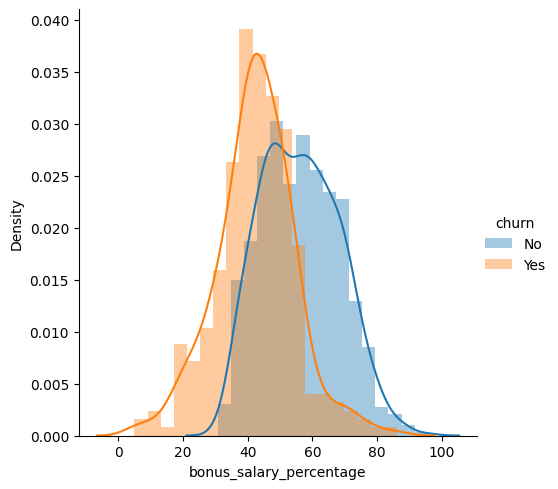

In [ ]:
#plot probability density function
plt.style.use('default')
sns.FacetGrid(df, hue='churn', height=5).map(sns.distplot, 'bonus_salary_percentage').add_legend()

- Pekerja dengan bonus gaji pada rentang 30-50% memiliki presentase yang lebih tinggi untuk berpindah.
- Pekerja dengan bonus gaji pada rentang 40-75% memiliki presentase yang lebih tinggi untuk tidak berpindah.

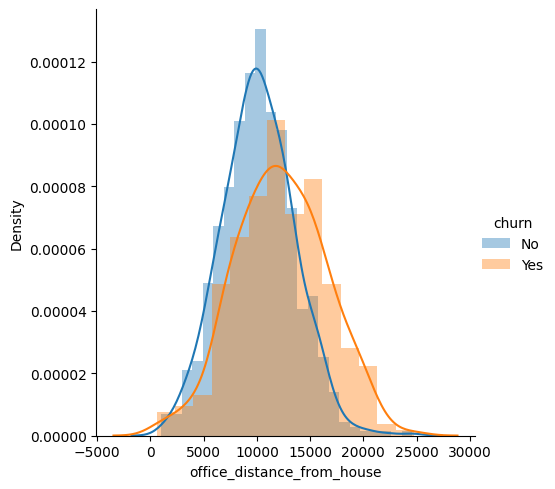

In [ ]:
#plot probability density function
plt.style.use('default')
sns.FacetGrid(df, hue='churn', height=5).map(sns.distplot, 'office_distance_from_house').add_legend()

- Pekerja dengan jarak ke kantor 7500-12500 m (jarak dekat) memiliki presentase yang lebih tinggi untuk tidak berpindah.
- Pekerja dengan jarak ke kantor 10000-20000 m (jarak jauh) memiliki presentase yang lebih tinggi untuk berpindah.

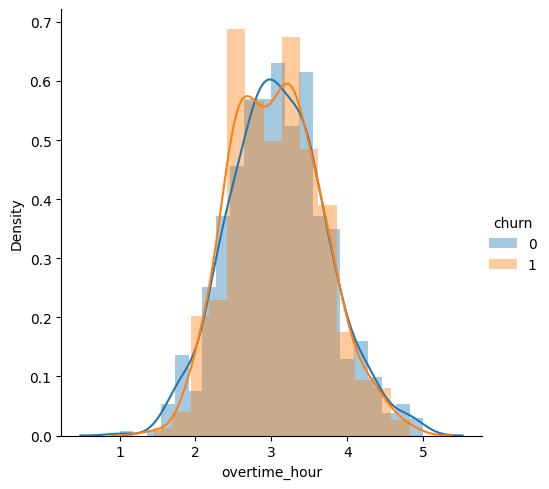

In [ ]:
#plot probability density function
plt.style.use('default')
sns.FacetGrid(df, hue='churn', height=5).map(sns.distplot, 'overtime_hour').add_legend()

- Waktu lembur pekerja berdasarkan churn atau tidak, memiliki sebaran yang hampir sama

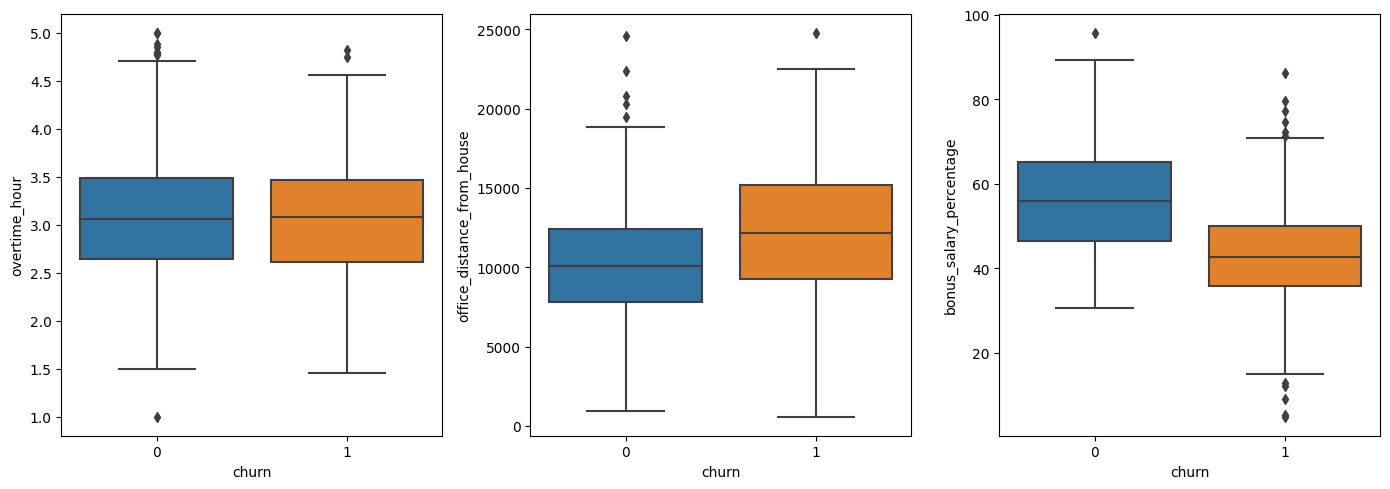

In [86]:
column_list = ['overtime_hour', 'office_distance_from_house', 'bonus_salary_percentage']

plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(14,5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='churn', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

- Bagi pekerja yang jarak dari rumah ke kantor yang jauh, memiliki peluang yang lebih tinggi untuk berpindah kerja.
- Bagi pekerja yang mendapatkan bonus gaji lebih tinggi, memiliki peluang yang lebih tinggi untuk tidak berpindah.


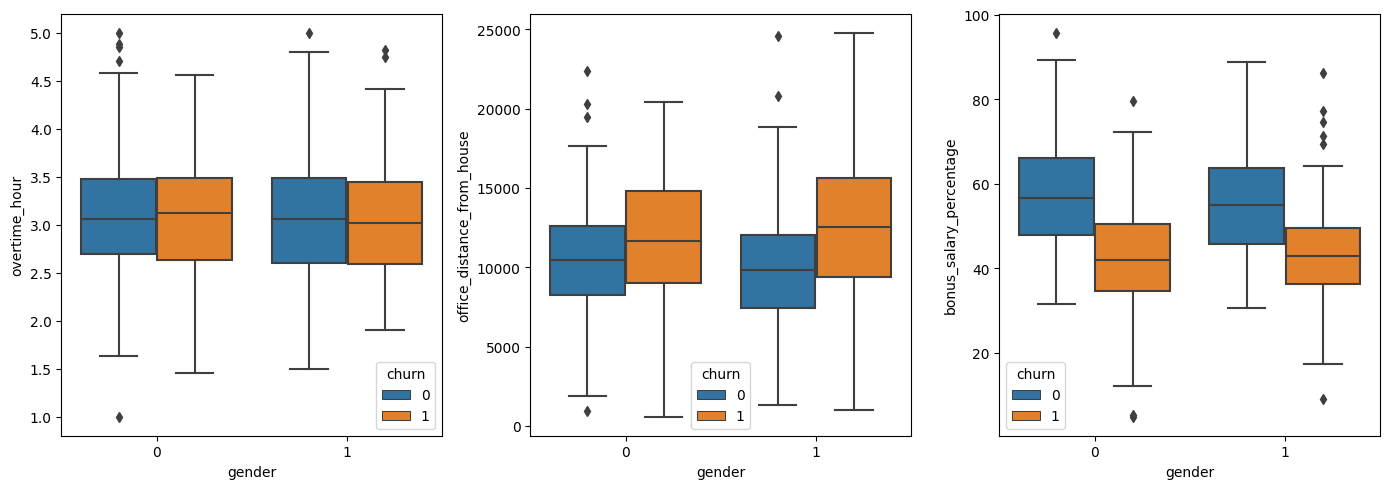

In [84]:
column_list = ['overtime_hour', 'office_distance_from_house', 'bonus_salary_percentage']

plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(14,5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='gender', y=col, hue='churn', ax=ax[i])

plt.tight_layout()
plt.show()

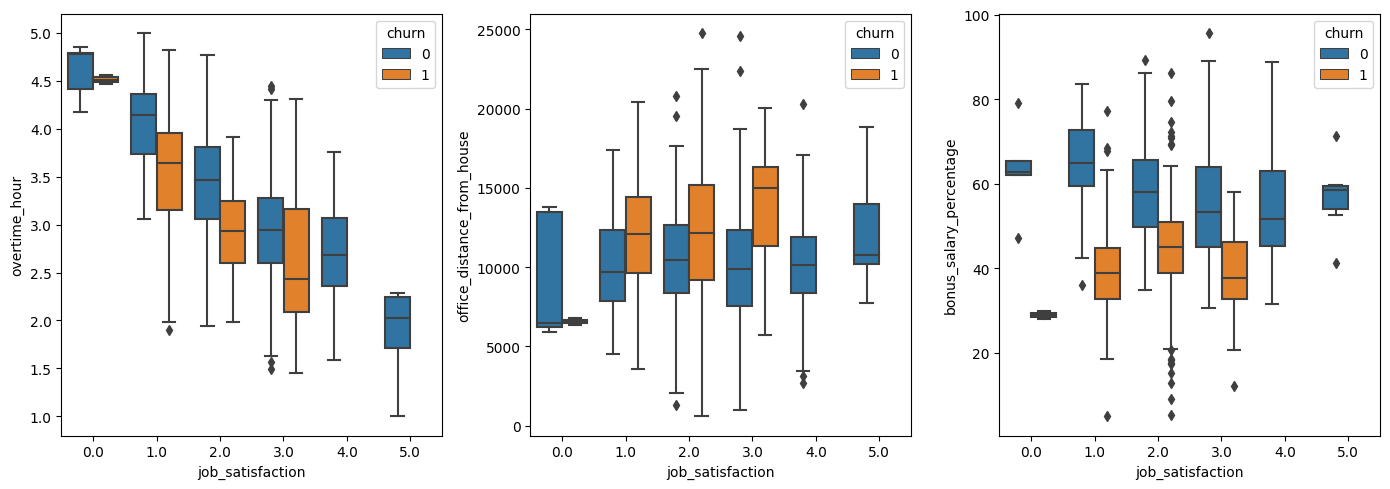

In [93]:
column_list = ['overtime_hour', 'office_distance_from_house', 'bonus_salary_percentage']

plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(14,5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='job_satisfaction', y=col, hue='churn', ax=ax[i])

plt.tight_layout()
plt.show()

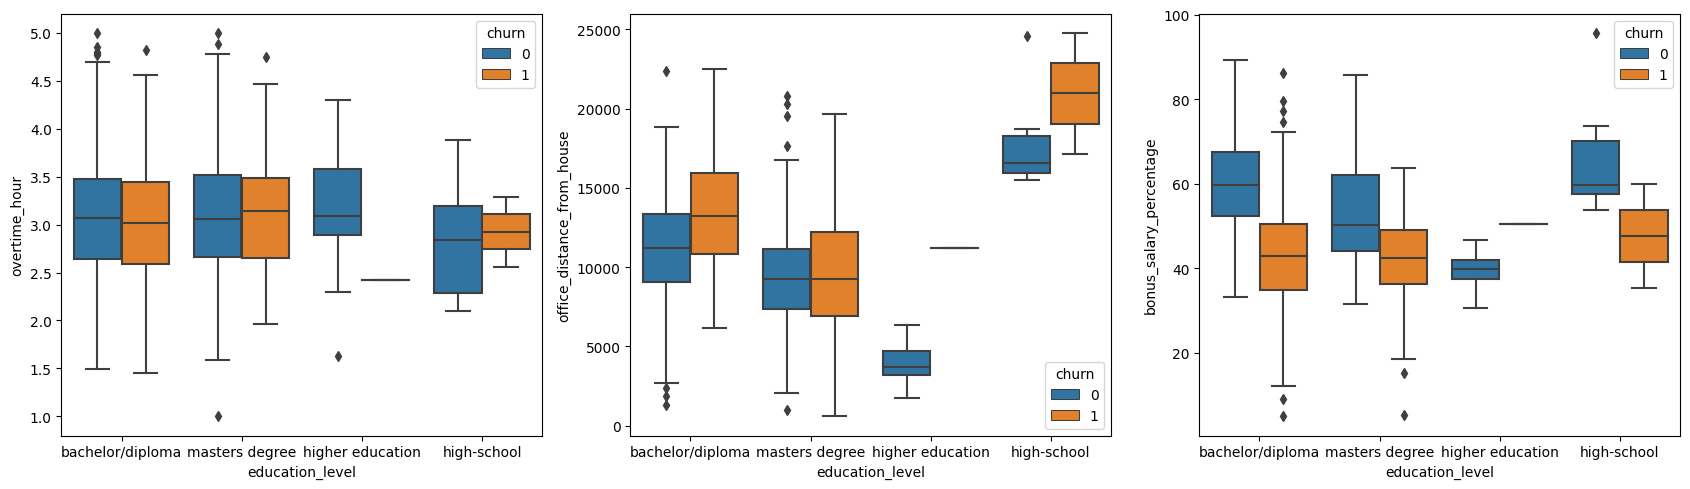

In [97]:
column_list = ['overtime_hour', 'office_distance_from_house', 'bonus_salary_percentage']

plt.style.use('default')
fig, ax = plt.subplots(1, 3, figsize=(17,5), sharey=False)
ax = ax.flatten()

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='education_level', y=col, hue='churn', ax=ax[i])

plt.tight_layout()
plt.show()

## Multivariate Analysis

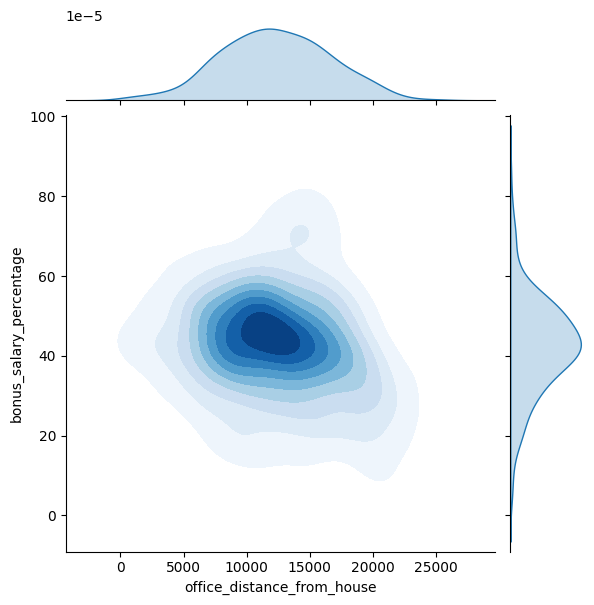

In [ ]:
df_churn = df[df["churn"]=="Yes"]

sns.jointplot(x="office_distance_from_house", y="bonus_salary_percentage", data=df_churn, kind="kde", cmap="Blues", shade=True, shade_lowest=False, fill=True);
plt.show();

- Pekerja yang berpindah, kebanyakan merupakan pekerja yang mendapatkan bonus gaji sekitar 40-50% dan jarak tempat kerja sekitar 10000-15000 m dari rumah.

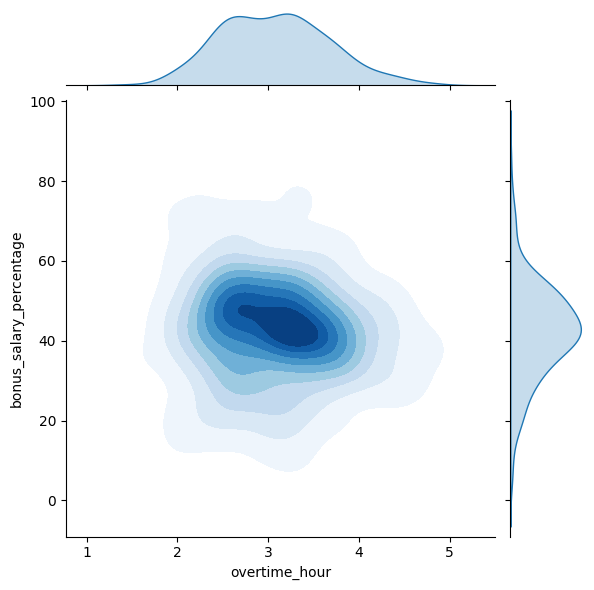

In [ ]:
sns.jointplot(x="overtime_hour", y="bonus_salary_percentage", data=df_churn, kind="kde", cmap="Blues", shade=True, shade_lowest=False, fill=True);
plt.show();

- Pekerja yang berpindah, kebanyakan merupakan pekerja yang mendapatkan bonus gaji sekitar 40-50% dan lama waktu lembur sekitar 3-4 jam.

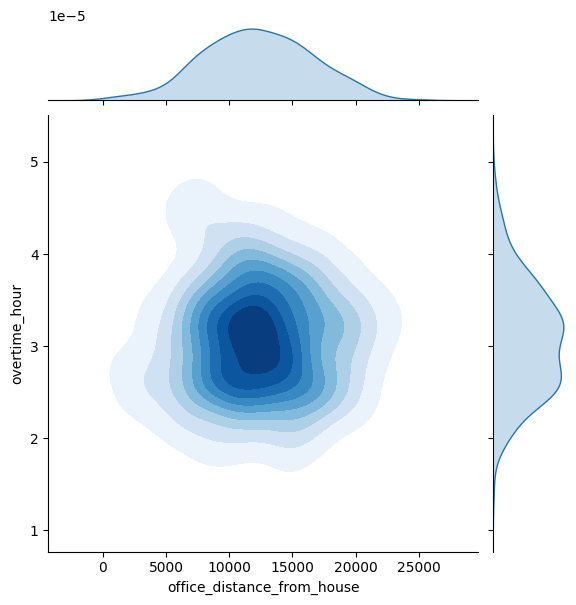

In [ ]:
sns.jointplot(x="office_distance_from_house", y="overtime_hour", data=df_churn, kind="kde", cmap="Blues", shade=True, shade_lowest=False, fill=True);
plt.show();

- Pekerja yang berpindah, kebanyakan merupakan pekerja yang mendapatkan waktu lembur sekitar 2.5-3.5 jam dan jarak tempat kerja sekitar 10000-15000 m dari rumah.

## Correlation Matrix

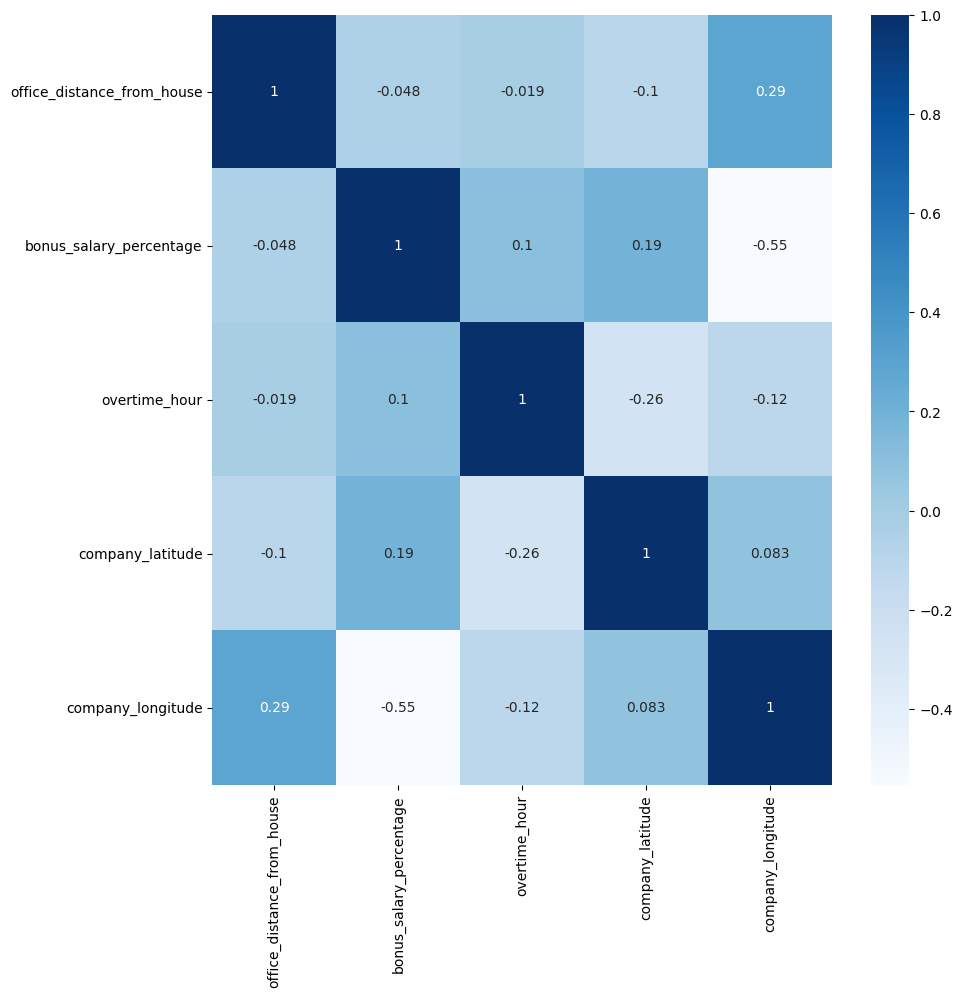

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

## Data Preprocessing for Modelling

In [20]:
df["gender"]= df["gender"].map({"Male": 0, "Female":1})
df["churn"]= df["churn"].map({"No": 0, "Yes": 1})
df.head()

,office_distance_from_house,bonus_salary_percentage,job_satisfaction,education_level,overtime_hour,company_latitude,company_longitude,gender,churn
0,8511.0,42.51,1.0,bachelor/diploma,3.416556,33.309014,-93.330348,0,0
1,10090.0,57.48,2.0,bachelor/diploma,2.897149,37.678983,-98.968097,0,0
2,18652.0,41.22,2.0,bachelor/diploma,3.180264,37.175891,-77.442812,1,1
3,13392.0,63.57,3.0,bachelor/diploma,3.429648,44.408084,-85.703296,0,0
4,13356.0,46.16,2.0,bachelor/diploma,3.812226,41.454702,-81.404655,1,1


In [21]:
df['churn'].value_counts()

0    724
1    309
Name: churn, dtype: int64

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   office_distance_from_house  1033 non-null   float64
 1   bonus_salary_percentage     1033 non-null   float64
 2   job_satisfaction            1033 non-null   object 
 3   education_level             1033 non-null   object 
 4   overtime_hour               1033 non-null   float64
 5   company_latitude            1033 non-null   float64
 6   company_longitude           1033 non-null   float64
 7   gender                      1033 non-null   int64  
 8   churn                       1033 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 72.8+ KB


In [23]:
df_dummies = pd.get_dummies(data=df, drop_first=True)

In [38]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_dummies[['office_distance_from_house','bonus_salary_percentage','overtime_hour','company_latitude','company_longitude']]= scale.fit_transform(df_dummies[['office_distance_from_house','bonus_salary_percentage','overtime_hour','company_latitude','company_longitude']])
df_dummies.head()

,office_distance_from_house,bonus_salary_percentage,overtime_hour,company_latitude,company_longitude,gender,churn,job_satisfaction_1.0,job_satisfaction_2.0,job_satisfaction_3.0,job_satisfaction_4.0,job_satisfaction_5.0,education_level_high-school,education_level_higher education,education_level_masters degree
0,-0.593647,-0.706060,0.536632,-2.253017,-0.650901,0,0,1,0,0,0,0,0,0,0
1,-0.179041,0.393211,-0.291851,-1.073086,-1.334547,0,0,0,1,0,0,0,0,0,0
2,2.069127,-0.800787,0.159734,-1.208925,1.275657,1,1,0,1,0,0,0,0,0,0
3,0.687982,0.840409,0.557516,0.743832,0.273972,0,0,0,0,1,0,0,0,0,0
4,0.678529,-0.438035,1.167749,-0.053608,0.795235,1,1,0,1,0,0,0,0,0,0


In [24]:
X = df_dummies.drop(columns = ['churn'])
y = df_dummies['churn'].values

In [26]:
X.columns

Index(['office_distance_from_house', 'bonus_salary_percentage',
       'overtime_hour', 'company_latitude', 'company_longitude', 'gender',
       'job_satisfaction_1.0', 'job_satisfaction_2.0', 'job_satisfaction_3.0',
       'job_satisfaction_4.0', 'job_satisfaction_5.0',
       'education_level_high-school', 'education_level_higher education',
       'education_level_masters degree'],
      dtype='object')

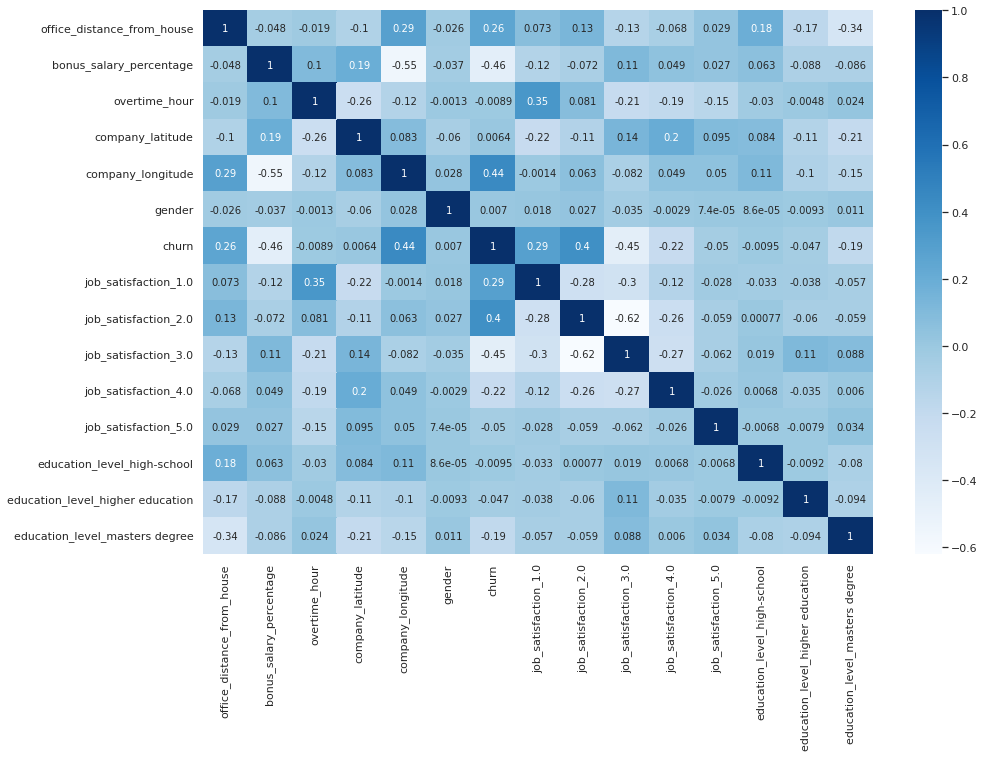

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummies.corr(),cbar=True,annot=True,cmap='Blues')

### Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods:


1. <span style="color: purple;">**feature_importance_**</span>: To check for relative feature importance
2. <span style="color: purple;">**Variable Inflation Factor (VIF)**</span>: To check for multicollinearity

feature importance

In [43]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.04652451 0.15284857 0.06668403 0.0830663  0.24291165 0.00998232
 0.00756328 0.00922242 0.20250614 0.14093713 0.01371045 0.0008743
 0.00063007 0.02253884]


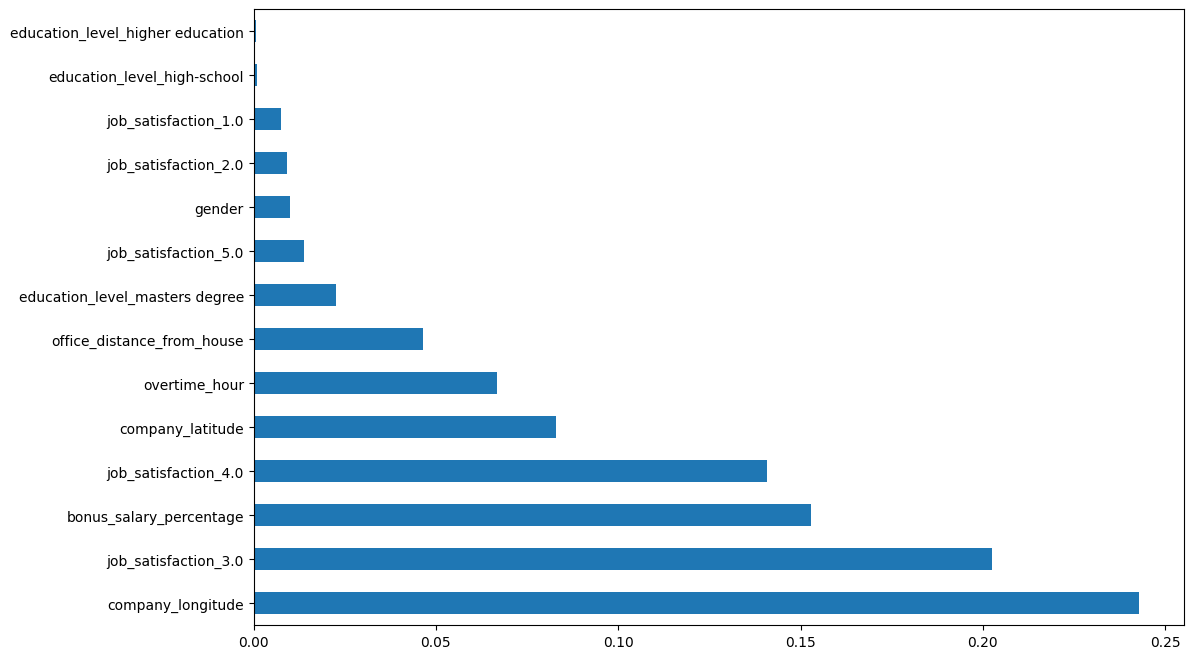

In [44]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

VIF - Multicolinearity

In [45]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [46]:
# Compute VIF on X
calc_vif(X)

,variables,VIF
0,office_distance_from_house,1.412662
1,bonus_salary_percentage,1.825514
2,overtime_hour,1.347542
3,company_latitude,1.400097
4,company_longitude,1.829435
5,gender,2.009313
6,job_satisfaction_1.0,1.381213
7,job_satisfaction_2.0,1.788260
8,job_satisfaction_3.0,2.103838
9,job_satisfaction_4.0,1.362233


## Model Building

- Logistic Regression (92.26%)
- Decision Tree (90.87%)
- K Nearest Neighbor (76.09%)
- Random Forest (95.02%)
- Support Vector Classifier (94.33%)
- XGBoost (95.58%)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40, stratify=y)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [53]:
#logistic regression model
lr = LogisticRegression(max_iter = 2000)
cv_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
lr.fit(X_train, y_train) 

#prediction with logistic regression model
y_predict = lr.predict(X_test)

#evaluation metrics for logistic regression model
lr_prec = precision_score(y_test,y_predict)
lr_rec = recall_score(y_test,y_predict)
lr_f1 = f1_score(y_test,y_predict)
lr_acc = accuracy_score(y_test,y_predict)

#decision tree model
dt = tree.DecisionTreeClassifier(random_state = 1)
cv_dt = cross_val_score(dt, X_train, y_train, cv=5).mean()
dt.fit(X_train,y_train) 

#prediction with decision tree model
y_predict = dt.predict(X_test)

#evaluation metrics for decision tree model
dt_prec = precision_score(y_test,y_predict)
dt_rec = recall_score(y_test,y_predict)
dt_f1 = f1_score(y_test,y_predict)
dt_acc = accuracy_score(y_test,y_predict)

#random forest model
rf = RandomForestClassifier(random_state = 1)
cv_rf = cross_val_score(rf,X_train,y_train,cv=5).mean()
rf.fit(X_train,y_train) 

#prediction with random forest model
y_predict = rf.predict(X_test)

#evaluation metrics for random forest model
rf_prec = precision_score(y_test,y_predict)
rf_rec = recall_score(y_test,y_predict)
rf_f1 = f1_score(y_test,y_predict)
rf_acc = accuracy_score(y_test,y_predict)

#knn model
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn, X_train, y_train, cv=5).mean()
knn.fit(X_train,y_train) 

#prediction with knn model
y_predict = knn.predict(X_test)

#evaluation metrics for knn model
knn_prec = precision_score(y_test,y_predict)
knn_rec = recall_score(y_test,y_predict)
knn_f1 = f1_score(y_test,y_predict)
knn_acc = accuracy_score(y_test,y_predict)

#supporrt vector classification model
svc = SVC(probability = True)
cv_svc = cross_val_score(svc, X_train, y_train, cv=5).mean()
svc.fit(X_train,y_train) 

#prediction with support vector classification model
y_predict = svc.predict(X_test)

#evaluation metrics for support vector classification model
svc_prec = precision_score(y_test,y_predict)
svc_rec = recall_score(y_test,y_predict)
svc_f1 = f1_score(y_test,y_predict)
svc_acc = accuracy_score(y_test,y_predict)

#xgboost model
xgb = XGBClassifier(random_state =1)
cv_xgb = cross_val_score(xgb, X_train, y_train, cv=5).mean()
xgb.fit(X_train,y_train) 

#prediction with xgboost model
y_predict = xgb.predict(X_test)

#evaluation metrics for xgboost model
xgb_prec = precision_score(y_test,y_predict)
xgb_rec = recall_score(y_test,y_predict)
xgb_f1 = f1_score(y_test,y_predict)
xgb_acc = accuracy_score(y_test,y_predict)

In [54]:
dic = {'Model':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier',
                'SVC', 'XGBClassifier'],
       'Precision':[lr_prec, dt_prec, rf_prec, knn_prec, svc_prec, xgb_prec],
       'Recall':[lr_rec, dt_rec, rf_rec, knn_rec, svc_rec, xgb_rec],
       'F1':[lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1],
       'Accuracy':[lr_acc, dt_acc, rf_acc, knn_acc, svc_acc, xgb_acc],
       'Cross Validation':[cv_lr, cv_dt, cv_rf, cv_knn, cv_svc, cv_xgb]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Cross Validation
3,KNeighborsClassifier,0.916667,0.946237,0.931217,0.958065,0.943333
4,SVC,0.907216,0.946237,0.926316,0.954839,0.943333
2,RandomForestClassifier,0.914894,0.924731,0.919786,0.951613,0.950230
5,XGBClassifier,0.903226,0.903226,0.903226,0.941935,0.955776
0,LogisticRegression,0.901099,0.881720,0.891304,0.935484,0.922586
1,DecisionTreeClassifier,0.926829,0.817204,0.868571,0.925806,0.908736


## Perfomance of Tuned Model

Setelah mendapatkan baseline, gunakan grid search untuk tuning model. Saya memilih 4 model teratas untuk tuning, yaitu **SVC, Random Forest, XG Boost, dan K-Nearest Neighbors.**

In [29]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [30]:
#performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [31]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,y_train)
clf_performance(best_clf_knn,'KNN')

#prediction with tuned knn model
y_predict_knn = best_clf_knn.best_estimator_.predict(X_test)

#evaluation metrics for tuned knn model 
knn1_tune = precision_score(y_test,y_predict_knn)
knn2_tune = recall_score(y_test,y_predict_knn)
knn3_tune = f1_score(y_test,y_predict_knn)
knn4_tune = accuracy_score(y_test,y_predict_knn)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.9488505747126437
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


In [58]:
#random fores parameter tuning
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

#prediction with tuned random forest model
y_predict_rf = best_clf_rf_rnd.best_estimator_.predict(X_test)

#evaluation metrics for tuned random forest model
rf1_tune = precision_score(y_test,y_predict_rf)
rf2_tune = recall_score(y_test,y_predict_rf)
rf3_tune = f1_score(y_test,y_predict_rf)
rf4_tune = accuracy_score(y_test,y_predict_rf)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random Forest
Best Score: 0.9585440613026821
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


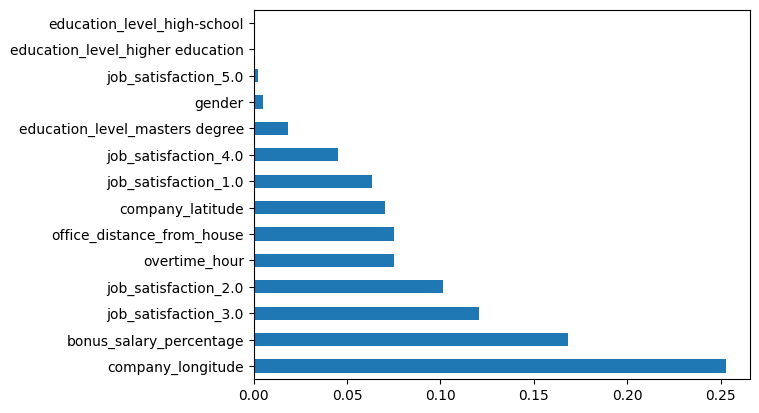

In [59]:
best_rf = best_clf_rf_rnd.best_estimator_.fit(X_train, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [62]:
#support vector classification parameter tuning
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
                                 
clf_svc = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train, y_train)
clf_performance(best_clf_svc,'SVC')

#prediction with tuned support vector classification model
y_predict_svc = best_clf_svc.best_estimator_.predict(X_test)

#evaluation metrics for tuned support vector classifier model
svc1_tune = precision_score(y_test,y_predict_svc)
svc2_tune = recall_score(y_test,y_predict_svc)
svc3_tune = f1_score(y_test,y_predict_svc)
svc4_tune = accuracy_score(y_test,y_predict_svc)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVC
Best Score: 0.93227969348659
Best Parameters: {'kernel': 'poly', 'degree': 3, 'C': 100}


In [63]:
#xgboost parameter tuning
xgb = XGBClassifier(random_state = 1)
param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

#prediction with tuned xgboost model
y_predict_xgb = best_clf_xgb.best_estimator_.predict(X_test)

#evaluation metrics for tuned xgboost model
xgb1_tune = precision_score(y_test,y_predict_xgb)
xgb2_tune = recall_score(y_test,y_predict_xgb)
xgb3_tune = f1_score(y_test,y_predict_xgb)
xgb4_tune = accuracy_score(y_test,y_predict_xgb)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
XGB
Best Score: 0.9488697318007663
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.5, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.55}


In [65]:
dic = {'Model':['KNeighbors', 'RandomForestClassifier', 'SVC', 'XGB'],
       'Precision':[knn1_tune, rf1_tune, svc1_tune, xgb1_tune],
       'Recall':[knn2_tune, rf2_tune, svc2_tune, xgb2_tune],
       'F1':[knn3_tune, rf3_tune, svc3_tune, xgb3_tune],
       'Accuracy':[knn4_tune, rf4_tune, svc4_tune, xgb4_tune]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy
0,KNeighbors,0.900000,0.967742,0.932642,0.958065
1,RandomForestClassifier,0.924731,0.924731,0.924731,0.954839
3,XGB,0.914894,0.924731,0.919786,0.951613
2,SVC,0.909091,0.860215,0.883978,0.932258


## Voting Clasifier pada Tuned Models

In [66]:
from sklearn.ensemble import VotingClassifier

best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf_rnd.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

#voting classifier using tuned models
voting_clf_xgb = VotingClassifier(estimators = [('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('knn', best_knn)], voting = 'soft')
print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_xgb : [0.95172414 0.95862069 0.93103448 0.97222222 0.96527778]
voting_clf_xgb mean : 0.9543869731800767


In [67]:
#prediction with voting classifier model
best_clf_vc = voting_clf_xgb.fit(X_train, y_train)
y_predict_vc = best_clf_vc.predict(X_test)

#evaluation metrics for voting classifier model
vc1_tune = precision_score(y_test,y_predict_vc)
vc2_tune = recall_score(y_test,y_predict_vc)
vc3_tune = f1_score(y_test,y_predict_vc)
vc4_tune = accuracy_score(y_test,y_predict_vc)
cv_mean = cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean()

dic = {'Model':['Voting Classifier XGB'],
       'Precision': [vc1_tune],
       'Recall':[vc2_tune],
       'F1':[vc3_tune],
       'Accuracy':[vc4_tune],
       'Cross Validation':[cv_mean]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Cross Validation
0,Voting Classifier XGB,0.945055,0.924731,0.934783,0.96129,0.954387


## Evaluation on Selected Model (Tuned K-Nearest Neighbors Model)



In [75]:
print(classification_report(y_test, y_predict_knn))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       217
           1       0.90      0.97      0.93        93

    accuracy                           0.96       310
   macro avg       0.94      0.96      0.95       310
weighted avg       0.96      0.96      0.96       310



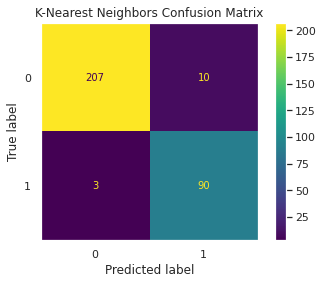

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict_knn)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid(False)
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

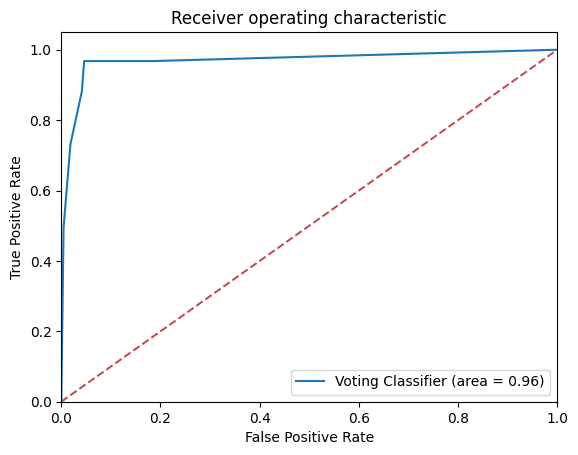

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, best_clf_knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, best_clf_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Voting Classifier (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### prediction comparison

In [78]:
#convert output to dataframe 
final_prediction = {'Churn Prediction': y_predict_knn, 'Real Churn': y_test}
final_prediction = pd.DataFrame(data=final_prediction)
final_prediction.head(30)

,Churn Prediction,Real Churn
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


#### Nomor 2.

- Saya melakukan perubahan tipe data pada kolom churn, gender, dan job_satisfaction karena tipe data yang seharusnya adalah data kategorik. 
- Kemudian, saya melakukan pengecekan null values pada setiap kolom. Hasil menunjukkan bahwa tidak terdapat null values pada data ini. Selain itu, tidak terdapat duplikasi data.

#### Nomor 3.

- False Positive dari kasus ini adalah karyawan yang berpindah perusahaan, namun diprediksikan tidak perindah.
- False Negative dari kasus ini adalah karyawan yang tidak berpindah perusahaan, namun diprediksikan berpindah.
- Dalam kasus ini, tipe 'kesalahan' yang lebih penting untuk diperhatikan adalah  False Negatives (Type 2 Errors) karena tipe error ini dapat merugikan perusahaan ketika seseorang yang menetap diperusahaan diprediksikan berpindah.

#### Nomor 4.

- Saya menggunakan Machine Learning Model: Tuned K-Nearest Neighbors Algorithm
- Untuk mengevaluasi model tersebut, saya menggunakan metrik: F1-score, AUC.
- Hasil evaluasi dari model tersebut adalah sebagai berikut:
    - AUC: 96%
    - F1-score accuracy: 93.26%